In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df  = pd.read_csv('data_banknote_authentication.csv')

In [3]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [8]:
df['Class'].value_counts()

0    762
1    610
Name: Class, dtype: int64

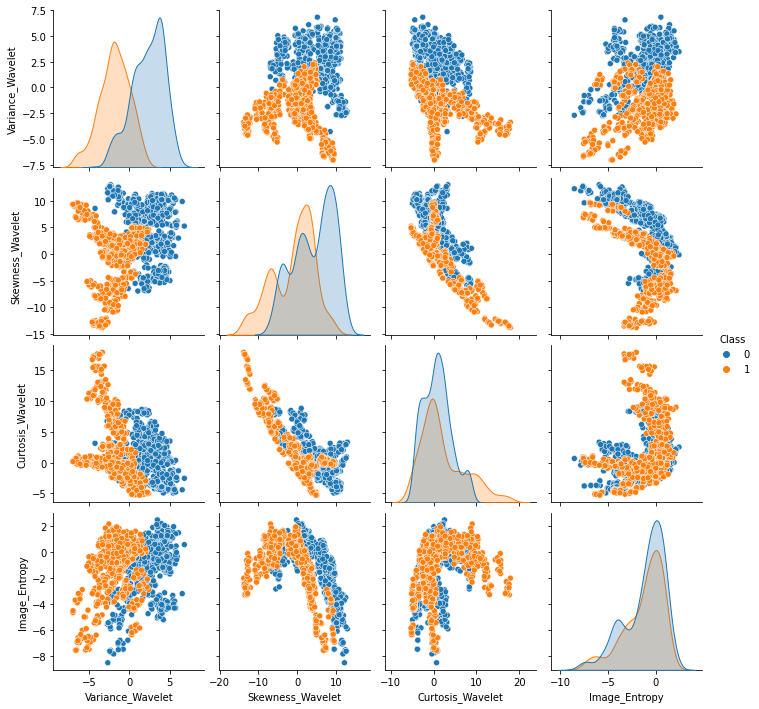

In [9]:
sns.pairplot(data=df,hue='Class')

<AxesSubplot:>

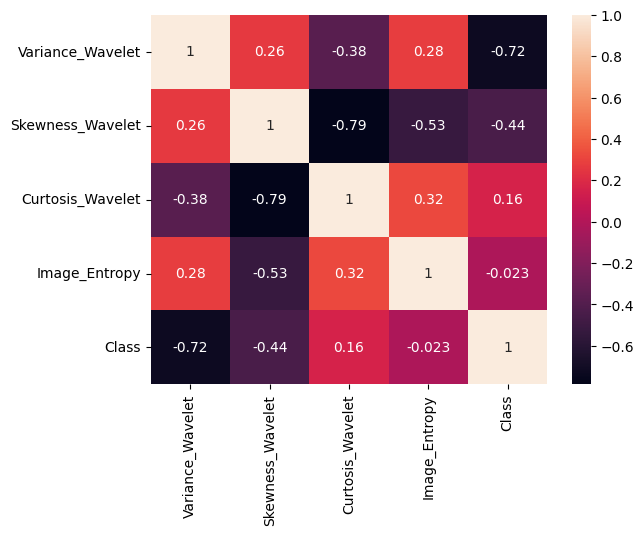

In [10]:
sns.heatmap(df.corr(),annot=True)

In [14]:
X= df.iloc[:,:-1]

In [15]:
y= df['Class']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=101)

In [18]:
from sklearn.model_selection import GridSearchCV

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [24]:
n_estimators = [64,100,128,200]
max_features = [2,3,4]
bootstrap = [True,False]
oob_score =[True,False]

In [25]:
param_grid = {'n_estimators':n_estimators,'max_features':max_features,'bootstrap':bootstrap,'oob_score':oob_score}

In [26]:
grid_rfc = GridSearchCV(rfc,param_grid)

In [27]:
grid_rfc.fit(X_train,y_train)

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [28]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 100, 'oob_score': True}

In [29]:
rfc = RandomForestClassifier(max_features=2,n_estimators=100,bootstrap=True,oob_score=True)

In [30]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=2, oob_score=True)

In [31]:
y_pred = rfc.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

Plotting errors vs number of estimators

In [39]:
errors =[]
misclassifications = []

for n in range(1,200):
    rfc = RandomForestClassifier(n_estimators=n,max_features=2)
    rfc.fit(X_train,y_train)
    pred = rfc.predict(X_test)
    error = 1- accuracy_score(y_test,pred)
   #in the following line we are comparing elements of y_test and pred 
   #and the ones that aren't equal are considered as misclassifications
    n_missed = np.sum(pred != y_test)
    
    errors.append(error)
    misclassifications.append(n_missed)

Text(0, 0.5, 'error')

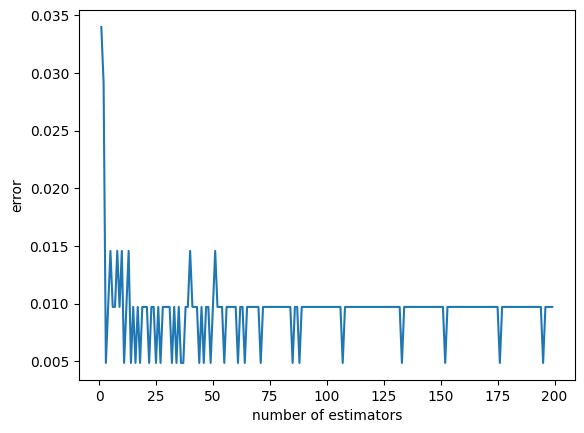

In [40]:
plt.plot(range(1,200),errors)
plt.xlabel('number of estimators')
plt.ylabel('error')

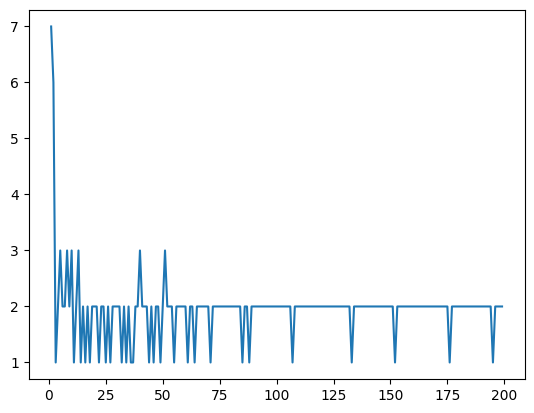

In [41]:
plt.plot(range(1,200),misclassifications)